Filtering annotated variants to extract small variants for ML

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
from tqdm import tqdm 
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
os.chdir( '/data/project/worthey_lab/projects/experimental_pipelines/tarun/DITTO/data/')

In [2]:
# Function to open and load config file for filtering columns and rows
def get_col_configs(config_f):
    with open(config_f) as fh:
        config_dict = yaml.safe_load(fh)

    # print(config_dict)
    return config_dict


In [3]:
# Load the config file as dictionary
config_f = "../configs/col_config.yaml"
config_dict = get_col_configs(config_f)

In [4]:
config_dict["raw_cols"]

['transcript',
 'gene',
 'consequence',
 'protein_hgvs',
 'cdna_hgvs',
 'chrom',
 'pos',
 'ref_base',
 'alt_base',
 'coding',
 'aloft.tolerant',
 'aloft.recessive',
 'aloft.dominant',
 'aloft.pred',
 'aloft.conf',
 'cadd.phred',
 'cgd.inheritance',
 'chasmplus.score',
 'chasmplus.pval',
 'civic.molecular_profile_score',
 'cosmic.variant_count',
 'cosmic_gene.occurrences',
 'cscape.score',
 'cgc.class',
 'cgc.inheritance',
 'cancer_genome_interpreter.resistant',
 'cancer_genome_interpreter.responsive',
 'cancer_genome_interpreter.other',
 'ccre_screen._group',
 'ccre_screen.bound',
 'clingen.disease',
 'clingen.classification',
 'clinpred.score',
 'clinvar.sig',
 'clinvar.id',
 'clinvar.rev_stat',
 'clinvar.sig_conf',
 'dann.score',
 'dann_coding.dann_coding_score',
 'dgi.interaction',
 'dgi.score',
 'ensembl_regulatory_build.region',
 'ess_gene.indispensability_score',
 'exac_gene.exac_pli',
 'exac_gene.exac_pnull',
 'exac_gene.exac_del_score',
 'exac_gene.exac_dup_score',
 'exac_gene.

In [5]:
#print('Loading data...')
#df = pd.read_csv("./interim/clinvar_parsed.csv.gz", usecols=config_dict["display_cols"], low_memory=False)
#print('Data Loaded !....')

In [6]:
print('Loading data...')
df = pd.read_csv("./interim/clinvar_6623_parsed.csv.gz", low_memory=False) #, usecols=config_dict["raw_cols"]
print('Data Loaded !....')


Loading data...
Data Loaded !....


In [7]:
df.columns.to_list()

['transcript',
 'gene',
 'consequence',
 'protein_hgvs',
 'cdna_hgvs',
 'chrom',
 'pos',
 'ref_base',
 'alt_base',
 'coding',
 'extra_vcf_info.CLNDN',
 'extra_vcf_info.CLNREVSTAT',
 'extra_vcf_info.CLNSIG',
 'extra_vcf_info.CLNSIGCONF',
 'aloft.affect',
 'aloft.tolerant',
 'aloft.recessive',
 'aloft.dominant',
 'aloft.pred',
 'aloft.conf',
 'cadd.phred',
 'cgd.inheritance',
 'chasmplus.score',
 'chasmplus.pval',
 'civic.molecular_profile_score',
 'cosmic.variant_count',
 'cosmic_gene.occurrences',
 'cscape.score',
 'cgc.class',
 'cgc.inheritance',
 'cancer_genome_interpreter.resistant',
 'cancer_genome_interpreter.responsive',
 'cancer_genome_interpreter.other',
 'ccre_screen._group',
 'ccre_screen.bound',
 'clingen.disease',
 'clingen.classification',
 'clinpred.score',
 'clinvar.sig',
 'clinvar.id',
 'clinvar.rev_stat',
 'clinvar.sig_conf',
 'dann.score',
 'dann_coding.dann_coding_score',
 'dgi.interaction',
 'dgi.score',
 'ensembl_regulatory_build.region',
 'ess_gene.indispensabilit

In [8]:
#df = df[config_dict["raw_cols"]]

In [9]:
df.shape

(12973645, 131)

In [10]:
# Number of variants that we started with
df[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape

(2177684, 4)

In [11]:
#df = df.replace(['.','-'], np.nan)

In [12]:
df['so'] = df['consequence']

In [13]:
df.dtypes

transcript                                  object
gene                                        object
consequence                                 object
protein_hgvs                                object
cdna_hgvs                                   object
chrom                                       object
pos                                          int64
ref_base                                    object
alt_base                                    object
coding                                      object
extra_vcf_info.CLNDN                        object
extra_vcf_info.CLNREVSTAT                   object
extra_vcf_info.CLNSIG                       object
extra_vcf_info.CLNSIGCONF                   object
aloft.affect                                object
aloft.tolerant                             float64
aloft.recessive                            float64
aloft.dominant                             float64
aloft.pred                                  object
aloft.conf                     

In [14]:
#df['fathmm.fathmm_score'].unique()
df["fathmm.fathmm_score"] = df["fathmm.fathmm_score"].replace(['.'], np.nan)
df["fathmm.fathmm_score"] = pd.to_numeric(df["fathmm.fathmm_score"])

In [15]:
original = df.copy()

In [16]:
#df = original.copy()

In [17]:
#Drop variants with leass than 30% of data along with duplicates. Also delete columns with all null values.
print('Dropping empty columns and rows along with duplicate rows...')
#df.dropna(axis=1, thresh=(df.shape[0]*0.15), inplace=True)  #thresh=(df.shape[0]/4)
df.dropna(axis=0, thresh=(df.shape[1]*0.3), inplace=True)  #thresh=(df.shape[1]*0.3),   how='all',
df.drop_duplicates()
df.dropna(axis=1, how='all', inplace=True)  #thresh=(df.shape[0]/4)
print('\nVariant-transcript pairs shape =', df.shape)
print('\nVariants shape =', df[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)
print('\nclinvar_CLNSIG:\n', df['extra_vcf_info.CLNSIG'].value_counts())
print('\nclinvar_review:\n', df['extra_vcf_info.CLNREVSTAT'].value_counts())
print('\nclinvar_confidence:\n', df['extra_vcf_info.CLNSIGCONF'].value_counts())
print('\nclingen_classification:\n', df['clingen.classification'].value_counts())

Dropping empty columns and rows along with duplicate rows...

Variant-transcript pairs shape = (11153639, 132)

Variants shape = (2137714, 4)

clinvar_CLNSIG:
 Uncertain_significance                                                  5501617
Likely_benign                                                           2728544
Benign                                                                   817285
Conflicting_interpretations_of_pathogenicity                             670871
Pathogenic                                                               642776
Likely_pathogenic                                                        370968
Benign/Likely_benign                                                     207316
Pathogenic/Likely_pathogenic                                             108214
not_provided                                                              77513
drug_response                                                             11509
other                                   


clingen_classification:
 Definitive                                                                                                                                                                                1637501
Limited                                                                                                                                                                                    729915
Definitive;Definitive                                                                                                                                                                      437814
Disputed                                                                                                                                                                                   328753
Moderate                                                                                                                                                                                   158776
Defi

In [18]:
df= df.loc[df['extra_vcf_info.CLNSIG'].isin(config_dict['train_ClinicalSignificance'])]
print('\nVariant-transcript pairs shape =', df.shape)
print('\nVariants shape =', df[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)


Variant-transcript pairs shape = (11047591, 132)

Variants shape = (2122117, 4)


In [19]:
df['extra_vcf_info.CLNSIG'].unique()

array(['Likely_benign', 'Uncertain_significance', 'Benign',
       'Conflicting_interpretations_of_pathogenicity', 'Pathogenic',
       'Likely_pathogenic', 'Benign/Likely_benign',
       'Pathogenic/Likely_pathogenic'], dtype=object)

In [20]:
pd.pivot_table(df, values='consequence', index='so', columns='extra_vcf_info.CLNSIG',
                          aggfunc='count').sort_values(by=['Benign','Pathogenic'], ascending=False)

extra_vcf_info.CLNSIG,Benign,Benign/Likely_benign,Conflicting_interpretations_of_pathogenicity,Likely_benign,Likely_pathogenic,Pathogenic,Pathogenic/Likely_pathogenic,Uncertain_significance
so,,,,,,,,
intron_variant,362725.0,41009.0,91923.0,756372.0,17725.0,37603.0,5736.0,407206.0
synonymous_variant,109885.0,65090.0,85163.0,1134299.0,1065.0,1364.0,426.0,67647.0
missense_variant,80315.0,33923.0,224600.0,142639.0,86905.0,74138.0,25632.0,2769515.0
"intron_variant,NMD_transcript_variant",42402.0,5911.0,17076.0,99950.0,5082.0,7134.0,1697.0,92851.0
3_prime_UTR_variant,30573.0,5160.0,6730.0,25982.0,1610.0,3713.0,444.0,105404.0
"intron_variant,processed_transcript",25025.0,3550.0,9357.0,48739.0,8988.0,9919.0,2013.0,79143.0
2kb_downstream_variant,21024.0,4152.0,9240.0,38903.0,5012.0,7613.0,1685.0,126609.0
2kb_upstream_variant,20854.0,2925.0,7068.0,37942.0,3687.0,6160.0,1438.0,88889.0
"intron_variant,lnc_RNA",17970.0,8461.0,67259.0,55714.0,35200.0,20851.0,6446.0,330377.0


In [21]:
#print(len(df[df['clinvar.sig_conf'].str.contains('athogen')==True][['clinvar.sig','clinvar.sig_conf']]))
#df[df['clinvar.sig_conf'].str.contains('athogen')==True][['clinvar.sig','clinvar.sig_conf']].tail(10)

In [22]:
#df[df['clinvar.sig_conf'].str.contains('athogenic, low')==True][['clinvar.sig','clinvar.sig_conf']]

In [23]:
#print(len(df[df['clinvar.sig'].str.contains('athogenic, low')==True][['clinvar.sig','clinvar.sig_conf']]))
#df[df['clinvar.sig'].str.contains('athogenic, low')==True][['clinvar.sig','clinvar.sig_conf']].head()

In [24]:
# Check if there are any categorical columns
num_cols = df._get_numeric_data().columns

list(set(df.columns) - set(num_cols))

['sift.confidence',
 'clinvar.sig_conf',
 'gene',
 'protein_hgvs',
 'alt_base',
 'clinvar.sig',
 'dbsnp.rsid',
 'coding',
 'ensembl_regulatory_build.region',
 'exac_gene.exac_cnv_flag',
 'uniprot.acc',
 'gtex.gtex_tissue',
 'extra_vcf_info.CLNSIG',
 'clingen.disease',
 'consequence',
 'ccre_screen._group',
 'omim.omim_id',
 'repeat.repeatclass',
 'dgi.interaction',
 'aloft.conf',
 'cgd.inheritance',
 'aloft.pred',
 'clingen.classification',
 'so',
 'extra_vcf_info.CLNREVSTAT',
 'chrom',
 'mutationtaster.model',
 'prec.stat',
 'cdna_hgvs',
 'extra_vcf_info.CLNSIGCONF',
 'cgc.class',
 'genehancer.feature_name',
 'extra_vcf_info.CLNDN',
 'transcript',
 'mutationtaster.prediction',
 'clinvar.rev_stat',
 'cgc.inheritance',
 'ccre_screen.bound',
 'ref_base',
 'aloft.affect']

In [25]:
len(list(set(df.columns) - set(num_cols)))

40

In [26]:
df[list(set(df.columns) - set(num_cols))].head()

,sift.confidence,clinvar.sig_conf,gene,protein_hgvs,alt_base,clinvar.sig,dbsnp.rsid,coding,ensembl_regulatory_build.region,exac_gene.exac_cnv_flag,...,cgc.class,genehancer.feature_name,extra_vcf_info.CLNDN,transcript,mutationtaster.prediction,clinvar.rev_stat,cgc.inheritance,ccre_screen.bound,ref_base,aloft.affect
0,High,NaN,OR4F5,p.Glu15Gly,G,NaN,rs781394307,Yes,NaN,NaN,...,NaN,NaN,Inborn_genetic_diseases,ENST00000335137,Polymorphism,NaN,NaN,NaN,A,NaN
1,NaN,NaN,OR4F5,p.Glu36Gly,G,NaN,rs781394307,Yes,NaN,NaN,...,NaN,NaN,Inborn_genetic_diseases,ENST00000641515,Polymorphism,NaN,NaN,NaN,A,NaN
2,High,NaN,OR4F5,p.Pro164Arg,G,NaN,rs1570409925,Yes,NaN,NaN,...,NaN,NaN,Inborn_genetic_diseases,ENST00000335137,Polymorphism,NaN,NaN,NaN,C,NaN
3,NaN,NaN,OR4F5,p.Pro185Arg,G,NaN,rs1570409925,Yes,NaN,NaN,...,NaN,NaN,Inborn_genetic_diseases,ENST00000641515,Polymorphism,NaN,NaN,NaN,C,NaN
4,High,NaN,OR4F5,p.Val198Met,A,NaN,rs766444643,Yes,NaN,NaN,...,NaN,NaN,Inborn_genetic_diseases,ENST00000335137,Polymorphism,NaN,NaN,NaN,G,NaN


In [27]:
#df[df['fathmm.fathmm_score'].str.contains('&') == True]['fathmm.fathmm_score']

In [28]:
df = df.drop(['clinvar.sig','clinvar.id','clinvar.rev_stat','clinvar.sig_conf'], axis=1)

In [29]:
df['exac_gene.exac_cnv_flag'].value_counts()

N    8520543
Y     802462
Name: exac_gene.exac_cnv_flag, dtype: int64

### Get data for training

In [30]:
#Filter variants for clinvar_review
df= df.loc[df['extra_vcf_info.CLNREVSTAT'].isin(config_dict['CLNREVSTAT'])]
#df= df.loc[df['extra_vcf_info.CLNSIG'].isin(config_dict['train_ClinicalSignificance'])]
print('\nVariant-transcript pairs shape =', df.shape)
print('\nVariants shape =', df[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)
print('\nclinvar_CLNSIG:\n', df['extra_vcf_info.CLNSIG'].value_counts())
print('\nclinvar_review:\n', df['extra_vcf_info.CLNREVSTAT'].value_counts())


Variant-transcript pairs shape = (1968054, 128)

Variants shape = (329136, 4)

clinvar_CLNSIG:
 Uncertain_significance          917228
Likely_benign                   380955
Benign/Likely_benign            201484
Benign                          165653
Pathogenic                      158220
Pathogenic/Likely_pathogenic    103967
Likely_pathogenic                40547
Name: extra_vcf_info.CLNSIG, dtype: int64

clinvar_review:
 criteria_provided,_multiple_submitters,_no_conflicts    1872415
reviewed_by_expert_panel                                  95535
practice_guideline                                          104
Name: extra_vcf_info.CLNREVSTAT, dtype: int64


In [23]:
#Filter variants for clinvar_review
df= df.loc[df['extra_vcf_info.CLNREVSTAT'].isin(config_dict['CLNREVSTAT'])]
df= df.loc[df['extra_vcf_info.CLNSIG'].isin(config_dict['train_ClinicalSignificance'])]
print('\nVariant-transcript pairs shape =', df.shape)
print('\nVariants shape =', df[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)
print('\nclinvar_CLNSIG:\n', df['extra_vcf_info.CLNSIG'].value_counts())
print('\nclinvar_review:\n', df['extra_vcf_info.CLNREVSTAT'].value_counts())


Variant-transcript pairs shape = (1968054, 128)

Variants shape = (329136, 4)

clinvar_CLNSIG:
 Uncertain_significance          917228
Likely_benign                   380955
Benign/Likely_benign            201484
Benign                          165653
Pathogenic                      158220
Pathogenic/Likely_pathogenic    103967
Likely_pathogenic                40547
Name: extra_vcf_info.CLNSIG, dtype: int64

clinvar_review:
 criteria_provided,_multiple_submitters,_no_conflicts    1872415
reviewed_by_expert_panel                                  95535
practice_guideline                                          104
Name: extra_vcf_info.CLNREVSTAT, dtype: int64


In [26]:
print(f"Genes = {df[['gene']].drop_duplicates().shape}")
print(f"transcripts = {df[['transcript']].drop_duplicates().shape}")
print(f"Genes-transcripts = {df[['gene','transcript']].drop_duplicates().shape}")

Genes = (7422, 1)
transcripts = (32783, 1)
Genes-transcripts = (32783, 2)


In [29]:
transcript_counts = df[['gene','transcript']].drop_duplicates().groupby("gene")["transcript"].nunique()

In [32]:
transcript_counts.values.max()

125

Text(0, 0.5, 'Number of Genes')

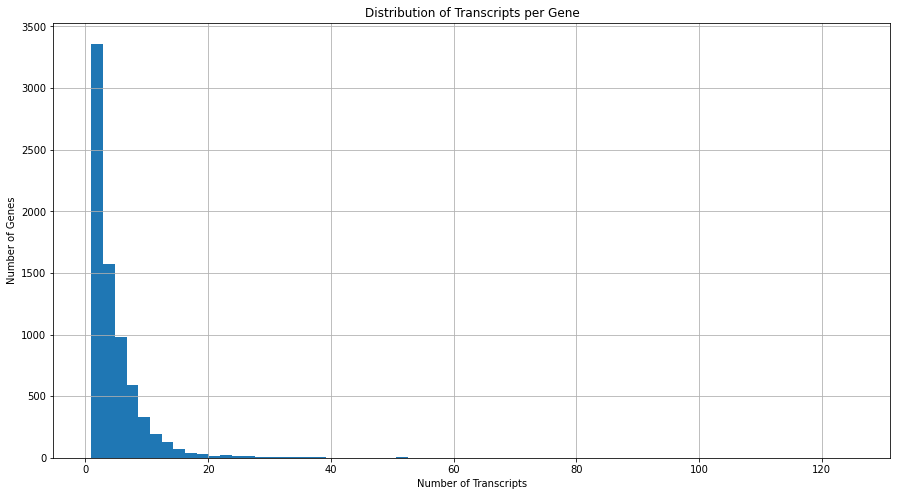

In [49]:
fig, ax = plt.subplots()
transcript_counts.to_frame().reset_index().transcript.hist(figsize=(15,8), bins=65)
# Add a title and labels to the axes
ax.set_title("Distribution of Transcripts per Gene")
ax.set_xlabel("Number of Transcripts")
ax.set_ylabel("Number of Genes")

In [31]:
pd.pivot_table(df, values='extra_vcf_info.CLNREVSTAT', index='extra_vcf_info.CLNSIG', #columns='clinvar.sig',
                          aggfunc='count')

,extra_vcf_info.CLNREVSTAT
extra_vcf_info.CLNSIG,
Benign,165653
Benign/Likely_benign,201484
Likely_benign,380955
Likely_pathogenic,40547
Pathogenic,158220
Pathogenic/Likely_pathogenic,103967
Uncertain_significance,917228


In [32]:
#Filter variants for clinvar_review
#df= df.loc[df['clinvar.rev_stat'].isin(config_dict['CLNREVSTAT'])]
#df= df.loc[df['clinvar.sig'].isin(config_dict['ClinicalSignificance'])]
#print('\nData shape (nsSNV) =', df.shape)
#print('\nclinvar_CLNSIG:\n', df['clinvar.sig'].value_counts())
#print('\nclinvar_review:\n', df['clinvar.rev_stat'].value_counts())

In [33]:
#print(len(df[df['clinvar.sig_conf'].str.contains('athogen')==True][['clinvar.sig','clinvar.sig_conf']]))

In [50]:
df['class'] = ''

In [51]:
conditions = [
    #(df['clinvar.sig'] == 'Conflicting interpretations of pathogenicity') & df['clinvar.sig_conf'].str.contains('athogen'),
    (df['extra_vcf_info.CLNSIG'] == 'Likely_benign') | (df['extra_vcf_info.CLNSIG'] == 'Benign') | (df['extra_vcf_info.CLNSIG'] == 'Benign/Likely_benign'),
    (df['extra_vcf_info.CLNSIG'] == 'Likely_pathogenic') | (df['extra_vcf_info.CLNSIG'] == 'Pathogenic') | (df['extra_vcf_info.CLNSIG'] == 'Pathogenic/Likely_pathogenic'),
    
]

values = ['low_impact', 'high_impact']

df['class'] = np.select(conditions, values)
df= df.loc[df['class'].isin(['low_impact', 'high_impact'])]
print('\nVariant-transcript pairs shape =', df.shape)
print('\nVariants shape =', df[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)
print('\nClasses:\n', df['class'].value_counts())


Variant-transcript pairs shape = (1050826, 129)

Variants shape = (185135, 4)

Classes:
 low_impact     748092
high_impact    302734
Name: class, dtype: int64


In [36]:
df['class'].unique()

array(['low_impact', 'high_impact'], dtype=object)

In [37]:
df['extra_vcf_info.CLNSIG'].unique()

array(['Benign/Likely_benign', 'Benign', 'Likely_benign',
       'Pathogenic/Likely_pathogenic', 'Pathogenic', 'Likely_pathogenic'],
      dtype=object)

In [38]:
pd.pivot_table(df, values='consequence', index='so', #columns='class',
                          aggfunc='count').sort_values(by='consequence', ascending=False)

,consequence
so,
synonymous_variant,298579
intron_variant,172463
missense_variant,121597
"NMD_transcript_variant,3_prime_UTR_variant",48963
stop_gained,47297
processed_transcript,35593
"intron_variant,lnc_RNA",34800
frameshift_truncation,31773
"intron_variant,NMD_transcript_variant",28629


In [39]:
syn = df[(df['consequence'].str.contains('synonymous_variant'))]
print('\nVariant-transcript pairs shape =', syn.shape)
print('\nVariants shape =', syn[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)
print('\nClasses:\n', syn['class'].value_counts())


Variant-transcript pairs shape = (318356, 129)

Variants shape = (78365, 4)

Classes:
 low_impact     317138
high_impact      1218
Name: class, dtype: int64


In [40]:
syn = df[(df['consequence'].str.contains('missense_variant'))]
print('\nVariant-transcript pairs shape =', syn.shape)
print('\nVariants shape =', syn[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)
print('\nClasses:\n', syn['class'].value_counts())


Variant-transcript pairs shape = (132739, 129)

Variants shape = (36811, 4)

Classes:
 low_impact     78646
high_impact    54093
Name: class, dtype: int64


In [41]:
syn = df[(df['consequence'].str.contains('intron_variant'))]
print('\nVariant-transcript pairs shape =', syn.shape)
print('\nVariants shape =', syn[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)
print('\nClasses:\n', syn['class'].value_counts())


Variant-transcript pairs shape = (285138, 129)

Variants shape = (67977, 4)

Classes:
 low_impact     207443
high_impact     77695
Name: class, dtype: int64


In [42]:
syn[syn['class']=='high_impact'].head()

,transcript,gene,consequence,protein_hgvs,cdna_hgvs,chrom,pos,ref_base,alt_base,coding,...,gnomad_gene.lof_z,gnomad_gene.mis_z,gnomad_gene.syn_z,gnomad_gene.pLI,gnomad_gene.pRec,gnomad_gene.pNull,gnomad3.af,phi.phi,so,class
31572,ENST00000288774,PEX10,"intron_variant,splice_site_variant",NaN,c.972+1G>C,chr1,2406483,C,G,NaN,...,1.7882,-0.20114,0.18559,0.000347,0.95426,0.045390,NaN,0.10434,"intron_variant,splice_site_variant",high_impact
31574,ENST00000447513,PEX10,"intron_variant,splice_site_variant",NaN,c.912+1G>C,chr1,2406483,C,G,NaN,...,1.7731,-0.24972,0.24154,0.000335,0.95228,0.047383,NaN,0.10434,"intron_variant,splice_site_variant",high_impact
31575,ENST00000507596,PEX10,"intron_variant,splice_site_variant",NaN,c.912+1G>C,chr1,2406483,C,G,NaN,...,2.1519,-0.26686,0.30038,0.007533,0.97830,0.014167,NaN,0.10434,"intron_variant,splice_site_variant",high_impact
32165,ENST00000288774,PEX10,"intron_variant,splice_site_variant",NaN,c.836+1G>C,chr1,2406719,C,G,NaN,...,1.7882,-0.20114,0.18559,0.000347,0.95426,0.045390,NaN,0.10434,"intron_variant,splice_site_variant",high_impact
32167,ENST00000447513,PEX10,"intron_variant,splice_site_variant",NaN,c.776+1G>C,chr1,2406719,C,G,NaN,...,1.7731,-0.24972,0.24154,0.000335,0.95228,0.047383,NaN,0.10434,"intron_variant,splice_site_variant",high_impact


In [43]:
#df[(df['consequence']=='stop_lost') & (df['class']=='low_impact')].head(50)

In [44]:
pd.pivot_table(df, values='consequence', index='so', #columns='class',
                          aggfunc='count').sort_values(by='consequence', ascending=False).to_csv('./interim/variant_by_type.csv')

In [45]:
pd.pivot_table(df, values='consequence', index='so', columns='extra_vcf_info.CLNSIG',
                          aggfunc='count').sort_values(by=['Benign','Pathogenic'], ascending=False)


extra_vcf_info.CLNSIG,Benign,Benign/Likely_benign,Likely_benign,Likely_pathogenic,Pathogenic,Pathogenic/Likely_pathogenic
so,,,,,,
intron_variant,51632.0,40249.0,59119.0,1762.0,14194.0,5507.0
synonymous_variant,35862.0,64772.0,197011.0,182.0,335.0,417.0
missense_variant,23153.0,33727.0,16070.0,9189.0,15409.0,24049.0
"intron_variant,NMD_transcript_variant",7383.0,5752.0,11369.0,684.0,1783.0,1658.0
"NMD_transcript_variant,3_prime_UTR_variant",5077.0,7736.0,19215.0,1397.0,10014.0,5524.0
processed_transcript,4949.0,6717.0,12762.0,1173.0,5611.0,4381.0
3_prime_UTR_variant,4859.0,3478.0,2759.0,180.0,493.0,432.0
"intron_variant,processed_transcript",4132.0,3445.0,4840.0,1185.0,2240.0,1945.0
"intron_variant,lnc_RNA",3805.0,8003.0,7356.0,5957.0,3651.0,6028.0


In [54]:
df1 = df[['chrom','pos','ref_base','alt_base', 'class']].drop_duplicates()
print('\nVariant-transcript pairs shape =', df1.shape)
print('\nVariants shape =', df1[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)


Variant-transcript pairs shape = (185135, 5)

Variants shape = (185135, 4)


In [55]:
y = df1['class']
X = df1.drop(['class'], axis=1)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=41, test_size=0.20
)
#X_train, X_val, y_train, y_val = train_test_split(
#    X_train, y_train, stratify=y_train, random_state=41, test_size=0.20
#)

In [57]:
print(f"Train data shape = \nVariant-transcripts: {y_train.shape}\nVariants: {X_train[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape}\n{y_train.value_counts()}" )

print(f"\nTest data shape = \nVariant-transcripts: {y_test.shape}\nVariants: {X_test[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape}\n{y_test.value_counts()}")


Train data shape = 
Variant-transcripts: (148108,)
Variants: (148108, 4)
low_impact     107790
high_impact     40318
Name: class, dtype: int64

Test data shape = 
Variant-transcripts: (37027,)
Variants: (37027, 4)
low_impact     26947
high_impact    10080
Name: class, dtype: int64


In [144]:
y_train.head()

3596154    low_impact
5735385    low_impact
8319921    low_impact
3077210    low_impact
9015064    low_impact
Name: class, dtype: object

In [102]:
X_train.head()

,chrom,pos,ref_base,alt_base
3596154,chr3,142458979,A,G
5735385,chr7,138722001,C,A
8319921,chr12,91151736,G,A
3077210,chr3,14146199,T,C
9015064,chr15,26567663,A,G


In [103]:
#y = df1['class']
#X = df1.drop(['class','aloft.affect','extra_vcf_info.CLNSIGCONF','extra_vcf_info.CLNSIG','extra_vcf_info.CLNREVSTAT','extra_vcf_info.CLNDN'], axis=1)


In [58]:
X_train_df = X_train.merge(df, on = ['chrom','pos','ref_base','alt_base'])
print('\nX_train shape =', X_train.shape)
print('\nVariant-transcript pairs shape =', X_train_df.shape)
print('\nVariants shape =', X_train_df[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)
print('\nClass counts shape =', X_train_df[['class']].value_counts())



X_train shape = (148108, 4)

Variant-transcript pairs shape = (842659, 129)

Variants shape = (148108, 4)

Class counts shape = class      
low_impact     600283
high_impact    242376
dtype: int64


In [59]:
X_test_df = X_test.merge(df, on = ['chrom','pos','ref_base','alt_base'])
print('\nX_test shape =', X_test.shape)
print('\nVariant-transcript pairs shape =', X_test_df.shape)
print('\nVariants shape =', X_test_df[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)
print('\nClass counts shape =', X_test_df[['class']].value_counts())



X_test shape = (37027, 4)

Variant-transcript pairs shape = (208167, 129)

Variants shape = (37027, 4)

Class counts shape = class      
low_impact     147809
high_impact     60358
dtype: int64


In [61]:
benchmark_columns = ['chrom','pos','ref_base','alt_base','transcript','cadd.phred','cscape.score','clinpred.score','dann.score','dann_coding.dann_coding_score','dgi.score','fathmm_xf_coding.fathmm_xf_coding_score','funseq2.score','linsight.value','lrt.lrt_score','loftool.loftool_score','metasvm.score','metalr.score','mutpred1.mutpred_general_score','mutpred_indel.score','mutation_assessor.score','mutationtaster.score','provean.score','phdsnpg.score','revel.score','sift.score','vest.score','dbscsnv.ada_score','dbscsnv.rf_score','varity_r.varity_r_loo', 'varity_r.varity_er_loo','class']
benchmark_df = X_test_df[benchmark_columns]
benchmark_df.columns = ['chrom','pos','ref_base','alt_base','transcript','CADD','Cscape','Clinpred','DANN','DANN_coding','DGI','fathmm_xf','funseq2','linsight','LRT','loftool','MetaSVM','MetaLR','Mutpred','Mutpred_indel','Mutation_assessor','Mutationtaster','Provean','phdsnpg','revel','SIFT','VEST','dbscsnv.ada_score','dbscsnv.rf_score','varity_r','varity_er','class']
benchmark_df.head()

,chrom,pos,ref_base,alt_base,transcript,CADD,Cscape,Clinpred,DANN,DANN_coding,...,Provean,phdsnpg,revel,SIFT,VEST,dbscsnv.ada_score,dbscsnv.rf_score,varity_r,varity_er,class
0,chr6,33443750,T,G,ENST00000293748,4.416,0.183598,NaN,0.530613,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,low_impact
1,chr6,33443750,T,G,ENST00000418600,4.416,0.183598,NaN,0.530613,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,low_impact
2,chr6,33443750,T,G,ENST00000428982,4.416,0.183598,NaN,0.530613,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,low_impact
3,chr6,33443750,T,G,ENST00000449372,4.416,0.183598,NaN,0.530613,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,low_impact
4,chr6,33443750,T,G,ENST00000628646,4.416,0.183598,NaN,0.530613,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,low_impact


In [62]:

benchmark_df.to_csv('./processed/train_data_3_star/benchmark_test_df.csv.gz', index=False)

In [147]:
del X, y, X_train, X_test, y_train, y_test

In [56]:
#print(f"Train data shape = \nVariant-transcripts: {y_train.shape}\nVariants: {X_train[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape}\n{y_train.value_counts()}" )

#print(f"\nTest data shape = \nVariant-transcripts: {y_test.shape}\nVariants: {X_train[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape}\n{y_test.value_counts()}")


In [57]:

pd.pivot_table(X_train_df, values='consequence', index='so', columns='class',
                          aggfunc='count').sort_values(by=['low_impact','high_impact'], ascending=False)

class,high_impact,low_impact
so,,
synonymous_variant,710.0,239012.0
intron_variant,17140.0,121139.0
missense_variant,39052.0,58552.0
"NMD_transcript_variant,3_prime_UTR_variant",13645.0,25699.0
"intron_variant,NMD_transcript_variant",3263.0,19808.0
processed_transcript,9027.0,19614.0
"NMD_transcript_variant,synonymous_variant",233.0,15624.0
"intron_variant,lnc_RNA",12415.0,14933.0
"intron_variant,processed_transcript",4344.0,10027.0


In [58]:
pd.pivot_table(X_test_df, values='consequence', index='so', columns='class',
                          aggfunc='count').sort_values(by=['low_impact','high_impact'], ascending=False)


class,high_impact,low_impact
so,,
synonymous_variant,224.0,58633.0
intron_variant,4323.0,29861.0
missense_variant,9595.0,14398.0
"NMD_transcript_variant,3_prime_UTR_variant",3290.0,6329.0
processed_transcript,2138.0,4814.0
"intron_variant,NMD_transcript_variant",862.0,4696.0
"intron_variant,lnc_RNA",3221.0,4231.0
"NMD_transcript_variant,synonymous_variant",50.0,3823.0
"intron_variant,processed_transcript",1026.0,2390.0


In [133]:
X_train_df = X_train_df.drop(['aloft.affect','extra_vcf_info.CLNSIGCONF','extra_vcf_info.CLNSIG','extra_vcf_info.CLNREVSTAT','extra_vcf_info.CLNDN'], axis=1)

print('\nVariant-transcript pairs shape =', X_train_df.shape)



Variant-transcript pairs shape = (842659, 124)


In [60]:
# Check how many columns are null
X_train_df.isnull().sum(axis = 0)

chrom                                           0
pos                                             0
ref_base                                        0
alt_base                                        0
transcript                                      0
gene                                            0
consequence                                     0
protein_hgvs                               391489
cdna_hgvs                                  108953
coding                                     188081
aloft.tolerant                             830706
aloft.recessive                            830706
aloft.dominant                             830706
aloft.pred                                 830706
aloft.conf                                 830706
cadd.phred                                  80466
cgd.inheritance                            666292
chasmplus.score                            816607
chasmplus.pval                             816607
civic.molecular_profile_score              842164


In [61]:
print('\nVariant-transcript pairs shape =', X_train_df.shape)
print('\nVariants shape =', X_train_df[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)


Variant-transcript pairs shape = (842659, 124)

Variants shape = (148108, 4)


In [62]:
X_train_df.dropna(axis=1, how='all', inplace=True)
print('\nVariant-transcript pairs shape =', X_train_df.shape)
print('\nVariants shape =', X_train_df[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)


Variant-transcript pairs shape = (842659, 124)

Variants shape = (148108, 4)


In [63]:
config_dict['train_cols']

['transcript',
 'gene',
 'consequence',
 'protein_hgvs',
 'cdna_hgvs',
 'chrom',
 'pos',
 'ref_base',
 'alt_base',
 'clingen.disease',
 'clingen.classification',
 'ncbigene.entrez',
 'omim.omim_id',
 'uniprot.acc',
 'dbsnp.rsid']

In [150]:
# Drop variant info columns so we can perform one-hot encoding
var = X_train_df[config_dict['train_cols']]
X_train_df = X_train_df.drop(config_dict['train_cols'], axis=1)

In [149]:
X_train_df.groupby('consequence').apply(lambda x: x.isnull().mean() * 100).to_csv(f"/data/project/worthey_lab/projects/experimental_pipelines/tarun/DITTO/data/processed/train_data_3_star/missing.csv")


<AxesSubplot:ylabel='Frequency'>

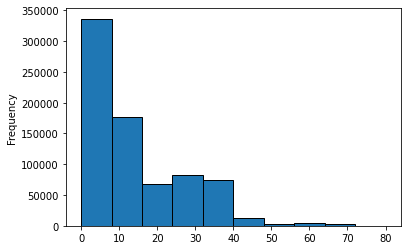

In [151]:
X_train_df['cadd.phred'].plot(kind='hist', edgecolor='black')

In [152]:
X_train_df.groupby('class')['cadd.phred'].apply(lambda x: round(x.isnull().mean() * 100,2)).to_frame()

,cadd.phred
class,
high_impact,26.55
low_impact,2.68


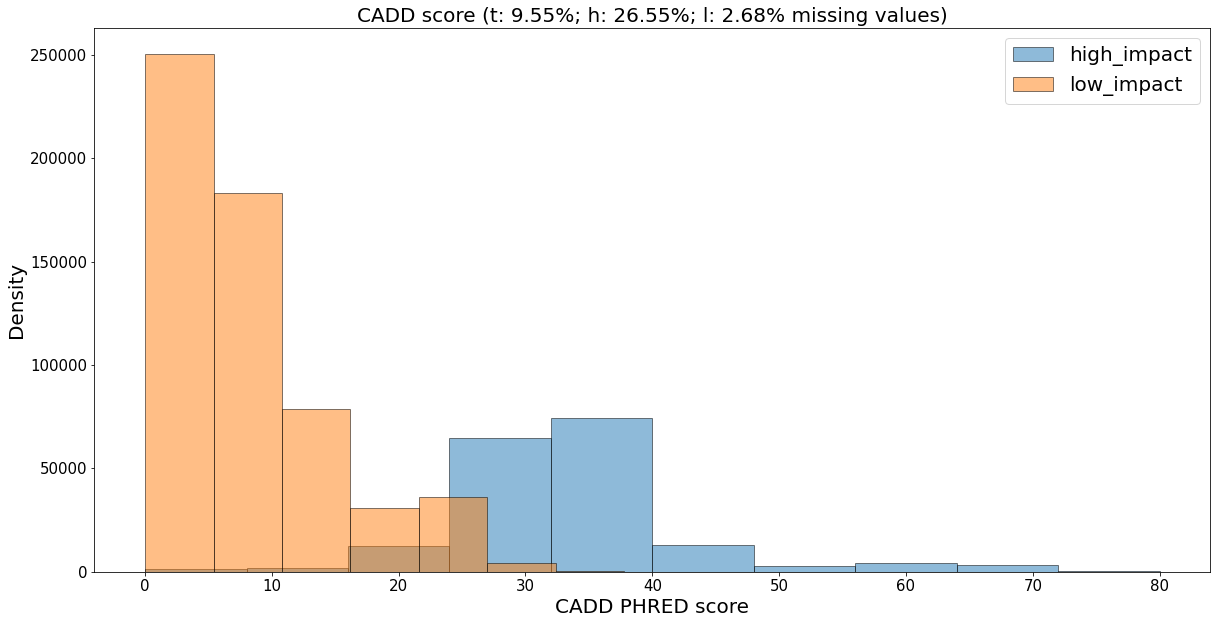

In [153]:
X_train_df.groupby('class')['cadd.phred'].plot(kind='hist', edgecolor='black',figsize=(20,10), alpha=0.5)
fsize = 20
#add legend
plt.legend(fontsize=fsize)
#plt.legend(X_train_df.groupby('class')['cadd.phred'].apply(lambda x: x.isnull().mean() * 100).to_frame(), fontsize=fsize)
perct = X_train_df['cadd.phred'].isnull().sum(axis = 0)/X_train_df.shape[0]
gperct = X_train_df.groupby('class')['cadd.phred'].apply(lambda x: round(x.isnull().mean() * 100,2)).to_frame()

#add x-axis label
plt.xlabel('CADD PHRED score', fontsize=fsize)
plt.ylabel('Density', fontsize=fsize)
plt.title(f"CADD score (t: {round(perct*100,2)}%; h: {gperct.iloc[0]['cadd.phred']}%; l: {gperct.iloc[1]['cadd.phred']}% missing values)", fontsize=fsize)
plt.tick_params(axis='both',  labelsize=fsize-5) #which='major',
plt.savefig(
            f"/data/project/worthey_lab/projects/experimental_pipelines/tarun/DITTO/data/processed/train_data_3_star/distribution/CADD.pdf",
            format="pdf",
            dpi=1000,
            bbox_inches="tight",
        )

100%|██████████| 114/114 [00:56<00:00,  2.02it/s]


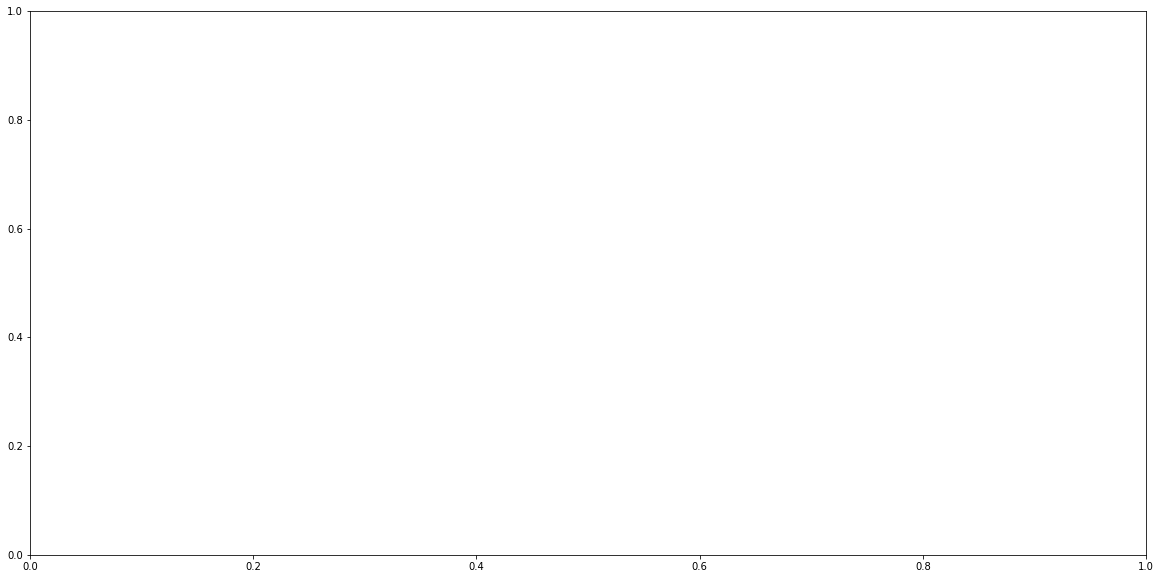

In [154]:
fsize = 20
for key in tqdm(X_train_df.columns):
            try:
                plt.clf()
                perct = X_train_df[key].isnull().sum(axis = 0)/X_train_df.shape[0]
                gperct = X_train_df.groupby('class')[key].apply(lambda x: round(x.isnull().mean() * 100,2)).to_frame()

                X_train_df.groupby('class')[key].plot(kind='hist', edgecolor='black', alpha=0.5,figsize=(20,10))
                
                #add legend
                plt.legend(fontsize=fsize)

                #add x-axis label
                plt.xlabel(key, fontsize=fsize)
                plt.ylabel('Frequency', fontsize=fsize)
                plt.title(f"{key} (t: {round(perct*100,2)}%; h: {gperct.iloc[0][key]}%; l: {gperct.iloc[1][key]}% missing values)", fontsize=fsize)
                plt.tick_params(axis='both',  labelsize=fsize-5)
                plt.savefig(
            f"/data/project/worthey_lab/projects/experimental_pipelines/tarun/DITTO/data/processed/train_data_3_star/distribution/{key}_hist.pdf",
            format="pdf",
            dpi=1000,
            bbox_inches="tight",
        )
            except:
                pass

In [90]:
print('\nVariant-transcript pairs shape =', X_train_df.shape)
#print('\nVariants shape =', X_train[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)


Variant-transcript pairs shape = (842659, 109)


In [91]:
# Check if there are any categorical columns
num_cols = X_train_df._get_numeric_data().columns

list(set(X_train_df.columns) - set(num_cols))

['cgc.class',
 'mutationtaster.prediction',
 'ccre_screen.bound',
 'cgc.inheritance',
 'so',
 'repeat.repeatclass',
 'cgd.inheritance',
 'prec.stat',
 'class',
 'aloft.pred',
 'mutationtaster.model',
 'coding',
 'gtex.gtex_tissue',
 'sift.confidence',
 'ensembl_regulatory_build.region',
 'genehancer.feature_name',
 'aloft.conf',
 'exac_gene.exac_cnv_flag',
 'dgi.interaction',
 'ccre_screen._group']

In [92]:
X_train_df[list(set(X_train_df.columns) - set(num_cols))].head()

,cgc.class,mutationtaster.prediction,ccre_screen.bound,cgc.inheritance,so,repeat.repeatclass,cgd.inheritance,prec.stat,class,aloft.pred,mutationtaster.model,coding,gtex.gtex_tissue,sift.confidence,ensembl_regulatory_build.region,genehancer.feature_name,aloft.conf,exac_gene.exac_cnv_flag,dgi.interaction,ccre_screen._group
0,TSG,NaN,NaN,somatic/germline,synonymous_variant,NaN,NaN,recessive,low_impact,NaN,NaN,Yes,NaN,High,NaN,NaN,NaN,N,inhibitor,NaN
1,TSG,NaN,NaN,somatic/germline,synonymous_variant,NaN,NaN,recessive,low_impact,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,N,inhibitor,NaN
2,NaN,Polymorphism,NaN,NaN,missense_variant,NaN,NaN,NaN,low_impact,NaN,simple_aae,Yes,NaN,High,NaN,NaN,NaN,N,NaN,NaN
3,NaN,Polymorphism,NaN,NaN,missense_variant,NaN,NaN,NaN,low_impact,NaN,simple_aae,Yes,NaN,High,NaN,NaN,NaN,N,NaN,NaN
4,NaN,Polymorphism,NaN,NaN,missense_variant,NaN,NaN,NaN,low_impact,NaN,simple_aae,Yes,NaN,High,NaN,NaN,NaN,N,NaN,NaN


In [93]:
X_train_df['cgc.class'].value_counts()

TSG                      245127
Oncogene, TSG, fusion     14750
Oncogene, fusion          13170
Oncogene                  11814
fusion                    11071
TSG, fusion                7589
Oncogene, TSG              4934
Name: cgc.class, dtype: int64

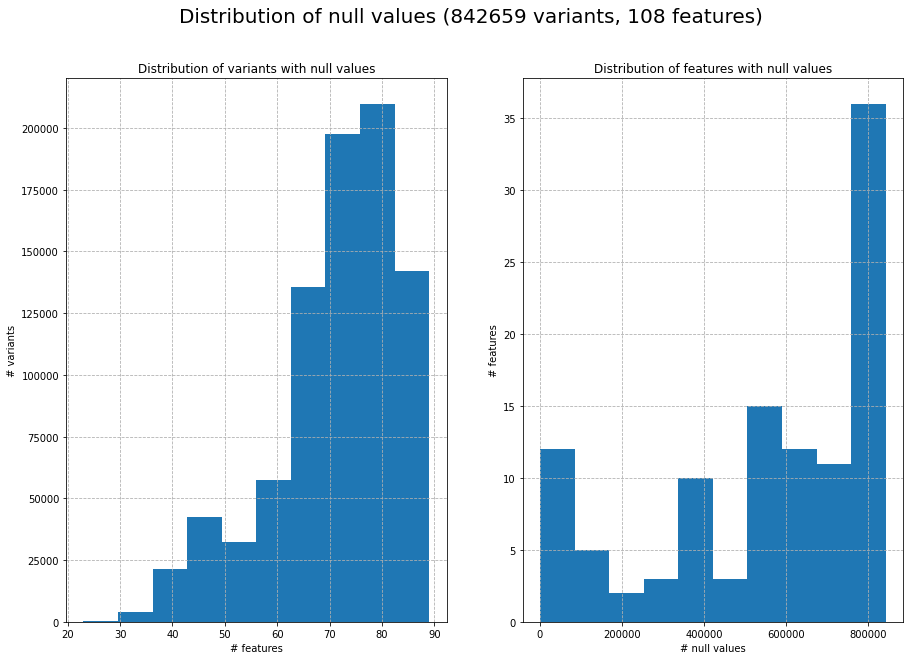

In [94]:
fig, [ax_var, ax_fts] = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle("Distribution of null values (842659 variants, 108 features)", fontsize=20)

#fig, ax = plt.subplots(figsize=(9, 8))
ax_var.set_title("Distribution of variants with null values")
#ax.plot(50, y, '--')
ax_var.set_xlabel('# features')
ax_var.set_ylabel('# variants')
ax_var.grid(linestyle="--")
ax_var.hist(X_train_df.isnull().sum(axis = 1))

#fig, ax = plt.subplots(figsize=(9, 8))
ax_fts.set_title("Distribution of features with null values")
#ax.plot(50, y, '--')
ax_fts.set_xlabel('# null values')
ax_fts.set_ylabel('# features')
ax_fts.grid(linestyle="--")
ax_fts.hist(X_train_df.isnull().sum(axis = 0))

#fig.tight_layout()
#for container in ax_var.containers:
#    ax_var.bar_label(container)
plt.show()


#fig.tight_layout()
#for container in ax_fts.containers:
#    ax_fts.bar_label(container)
#plt.show()

In [155]:
median_scores = X_train_df.median().to_dict()
median_scores

/scratch/local/ipykernel_114543/1806320573.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_scores = X_train_df.median().to_dict()


{'extra_vcf_info.CLNSIGCONF': nan,
 'aloft.tolerant': 0.03175,
 'aloft.recessive': 0.5456,
 'aloft.dominant': 0.38385,
 'cadd.phred': 9.129,
 'chasmplus.score': 0.073,
 'chasmplus.pval': 0.277,
 'civic.molecular_profile_score': 7.5,
 'cosmic.variant_count': 1.0,
 'cosmic_gene.occurrences': 1725.0,
 'cscape.score': 0.436793,
 'cancer_genome_interpreter.resistant': 0.0,
 'cancer_genome_interpreter.responsive': 2.0,
 'cancer_genome_interpreter.other': 0.0,
 'clinpred.score': 0.109,
 'dann.score': 0.6540942459117577,
 'dann_coding.dann_coding_score': 0.994319113925808,
 'dgi.score': 3.55,
 'ess_gene.indispensability_score': 0.863945523287189,
 'exac_gene.exac_pli': 0.0614137585139882,
 'exac_gene.exac_pnull': 1.01047322872054e-05,
 'exac_gene.exac_del_score': 0.2455437788049,
 'exac_gene.exac_dup_score': 0.194157677715669,
 'exac_gene.exac_cnv_score': 0.034861123316654,
 'fathmm.fathmm_score': -1.59,
 'fathmm_xf_coding.fathmm_xf_coding_score': 0.346275,
 'funseq2.score': 0.498146534129084,

100%|██████████| 114/114 [00:32<00:00,  3.54it/s]


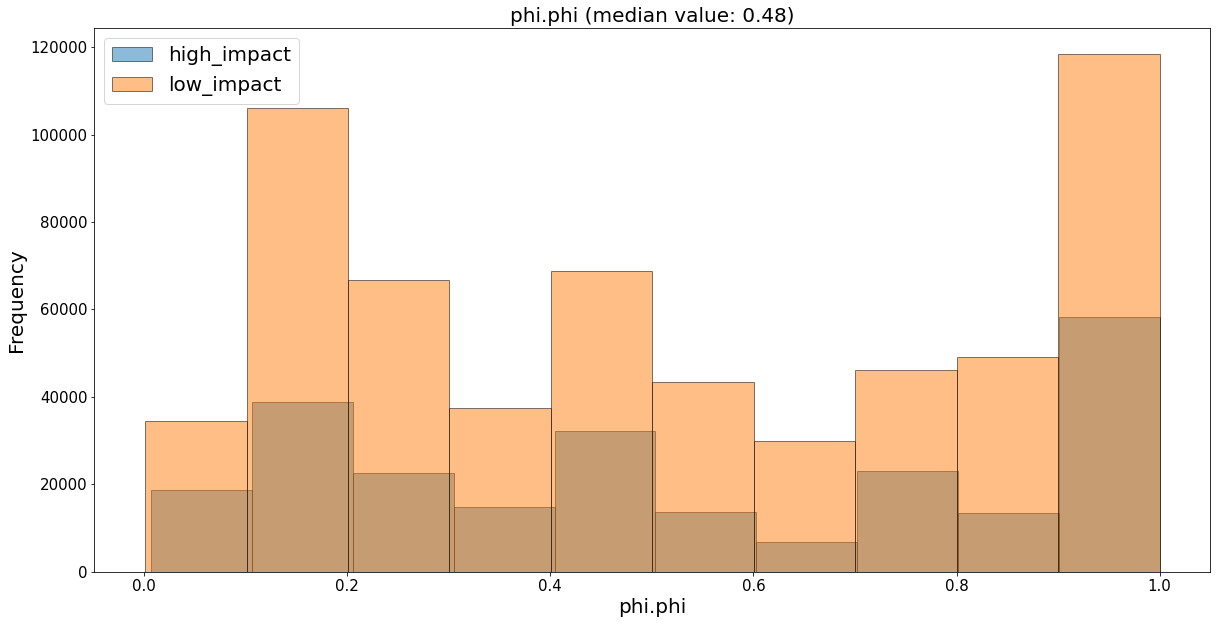

In [156]:
fsize = 20
for key in tqdm(X_train_df.columns):
            try:
                X_train_df[key] = X_train_df[key].fillna(median_scores[key])
                plt.clf()
                X_train_df.groupby('class')[key].plot(kind='hist', edgecolor='black', alpha=0.5,figsize=(20,10))
                
                #add legend
                plt.legend(fontsize=fsize)

                #add x-axis label
                plt.xlabel(key, fontsize=fsize)
                plt.ylabel('Frequency', fontsize=fsize)
                plt.title(f"{key} (median value: {round(median_scores[key],2)})", fontsize=fsize)
                plt.tick_params(axis='both',  labelsize=fsize-5)
                plt.savefig(
            f"/data/project/worthey_lab/projects/experimental_pipelines/tarun/DITTO/data/processed/train_data_3_star/distribution/{key}_hist_after.pdf",
            format="pdf",
            dpi=1000,
            bbox_inches="tight",
        )
            except:
                pass

In [83]:
#Fill NAs in dataframe
X_train_df['gnomad3.af'] = X_train_df['gnomad3.af'].fillna(0)
X_train_df = X_train_df.fillna(X_train_df.median())

/scratch/local/ipykernel_221266/1617137900.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train_df = X_train_df.fillna(X_train_df.median())


In [97]:
list(config_dict["dummies_sep"].keys())

['gtex.gtex_tissue',
 'dgi.interaction',
 'cgd.inheritance',
 'so',
 'repeat.repeatclass',
 'genehancer.feature_name',
 'cgc.inheritance',
 'cgc.class']

In [86]:
#Perform one-hot encoding using sep
for key in tqdm(config_dict["dummies_sep"]):
    X_train_df = pd.concat((X_train_df , X_train_df[key].str.get_dummies(sep = config_dict["dummies_sep"][key])), axis =1)

X_train_df.shape

100%|██████████| 8/8 [00:31<00:00,  3.88s/it]


(842659, 229)

In [87]:
# Check how many columns are null
X_train_df.isnull().sum(axis = 0)

coding                                     188081
aloft.tolerant                                  0
aloft.recessive                                 0
aloft.dominant                                  0
aloft.pred                                 830706
aloft.conf                                 830706
cadd.phred                                      0
cgd.inheritance                            666292
chasmplus.score                                 0
chasmplus.pval                                  0
civic.molecular_profile_score                   0
cosmic.variant_count                            0
cosmic_gene.occurrences                         0
cscape.score                                    0
cgc.class                                  534204
cgc.inheritance                            531822
cancer_genome_interpreter.resistant             0
cancer_genome_interpreter.responsive            0
cancer_genome_interpreter.other                 0
ccre_screen._group                         692123


In [88]:
X_train_df = X_train_df.drop(list(config_dict["dummies_sep"].keys()), axis=1)
print('\nVariant-transcript pairs shape =', X_train_df.shape)
#print('\nVariants shape =', X_train[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)


Variant-transcript pairs shape = (842659, 221)


In [77]:
#Perform one-hot encoding
y = X_train_df['class']
X_train_df = pd.get_dummies(X_train_df.drop('class', axis=1), prefix_sep='_')
print('\nVariant-transcript pairs shape =', X_train_df.shape)
#print('\nVariants shape =', X_train_df[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)


Variant-transcript pairs shape = (842659, 240)


In [78]:
X_train_df = pd.concat([y.reset_index(drop=True), X_train_df.reset_index(drop=True)], axis=1)
del y

In [79]:
# Check how many columns are null
X_train_df.isnull().sum(axis = 0)

class                                                       0
aloft.tolerant                                              0
aloft.recessive                                             0
aloft.dominant                                              0
cadd.phred                                                  0
chasmplus.score                                             0
chasmplus.pval                                              0
civic.molecular_profile_score                               0
cosmic.variant_count                                        0
cosmic_gene.occurrences                                     0
cscape.score                                                0
cancer_genome_interpreter.resistant                         0
cancer_genome_interpreter.responsive                        0
cancer_genome_interpreter.other                             0
clinpred.score                                              0
dann.score                                                  0
dann_cod

In [85]:

from sklearn.preprocessing import label_binarize
Y_train = label_binarize(
        X_train_df['class'].values, classes=list(np.unique(X_train_df['class']))
    ).ravel()
Y_train.value_counts()

array([1, 1, 1, ..., 1, 1, 1])

In [93]:
y = X_train_df['class']
X_train_df['class'] = Y_train
X_train_df['class'].value_counts()

1    600283
0    242376
Name: class, dtype: int64

In [92]:
X_train_df.dtypes

class                                                         int64
aloft.tolerant                                              float64
aloft.recessive                                             float64
aloft.dominant                                              float64
cadd.phred                                                  float64
chasmplus.score                                             float64
chasmplus.pval                                              float64
civic.molecular_profile_score                               float64
cosmic.variant_count                                        float64
cosmic_gene.occurrences                                     float64
cscape.score                                                float64
cancer_genome_interpreter.resistant                         float64
cancer_genome_interpreter.responsive                        float64
cancer_genome_interpreter.other                             float64
clinpred.score                                  

In [95]:
X_train_df['cancer_genome_interpreter.other'].value_counts()

0.0    842659
Name: cancer_genome_interpreter.other, dtype: int64

In [96]:
X_train_df = X_train_df.drop(['cancer_genome_interpreter.other'],axis=1)

<AxesSubplot:>

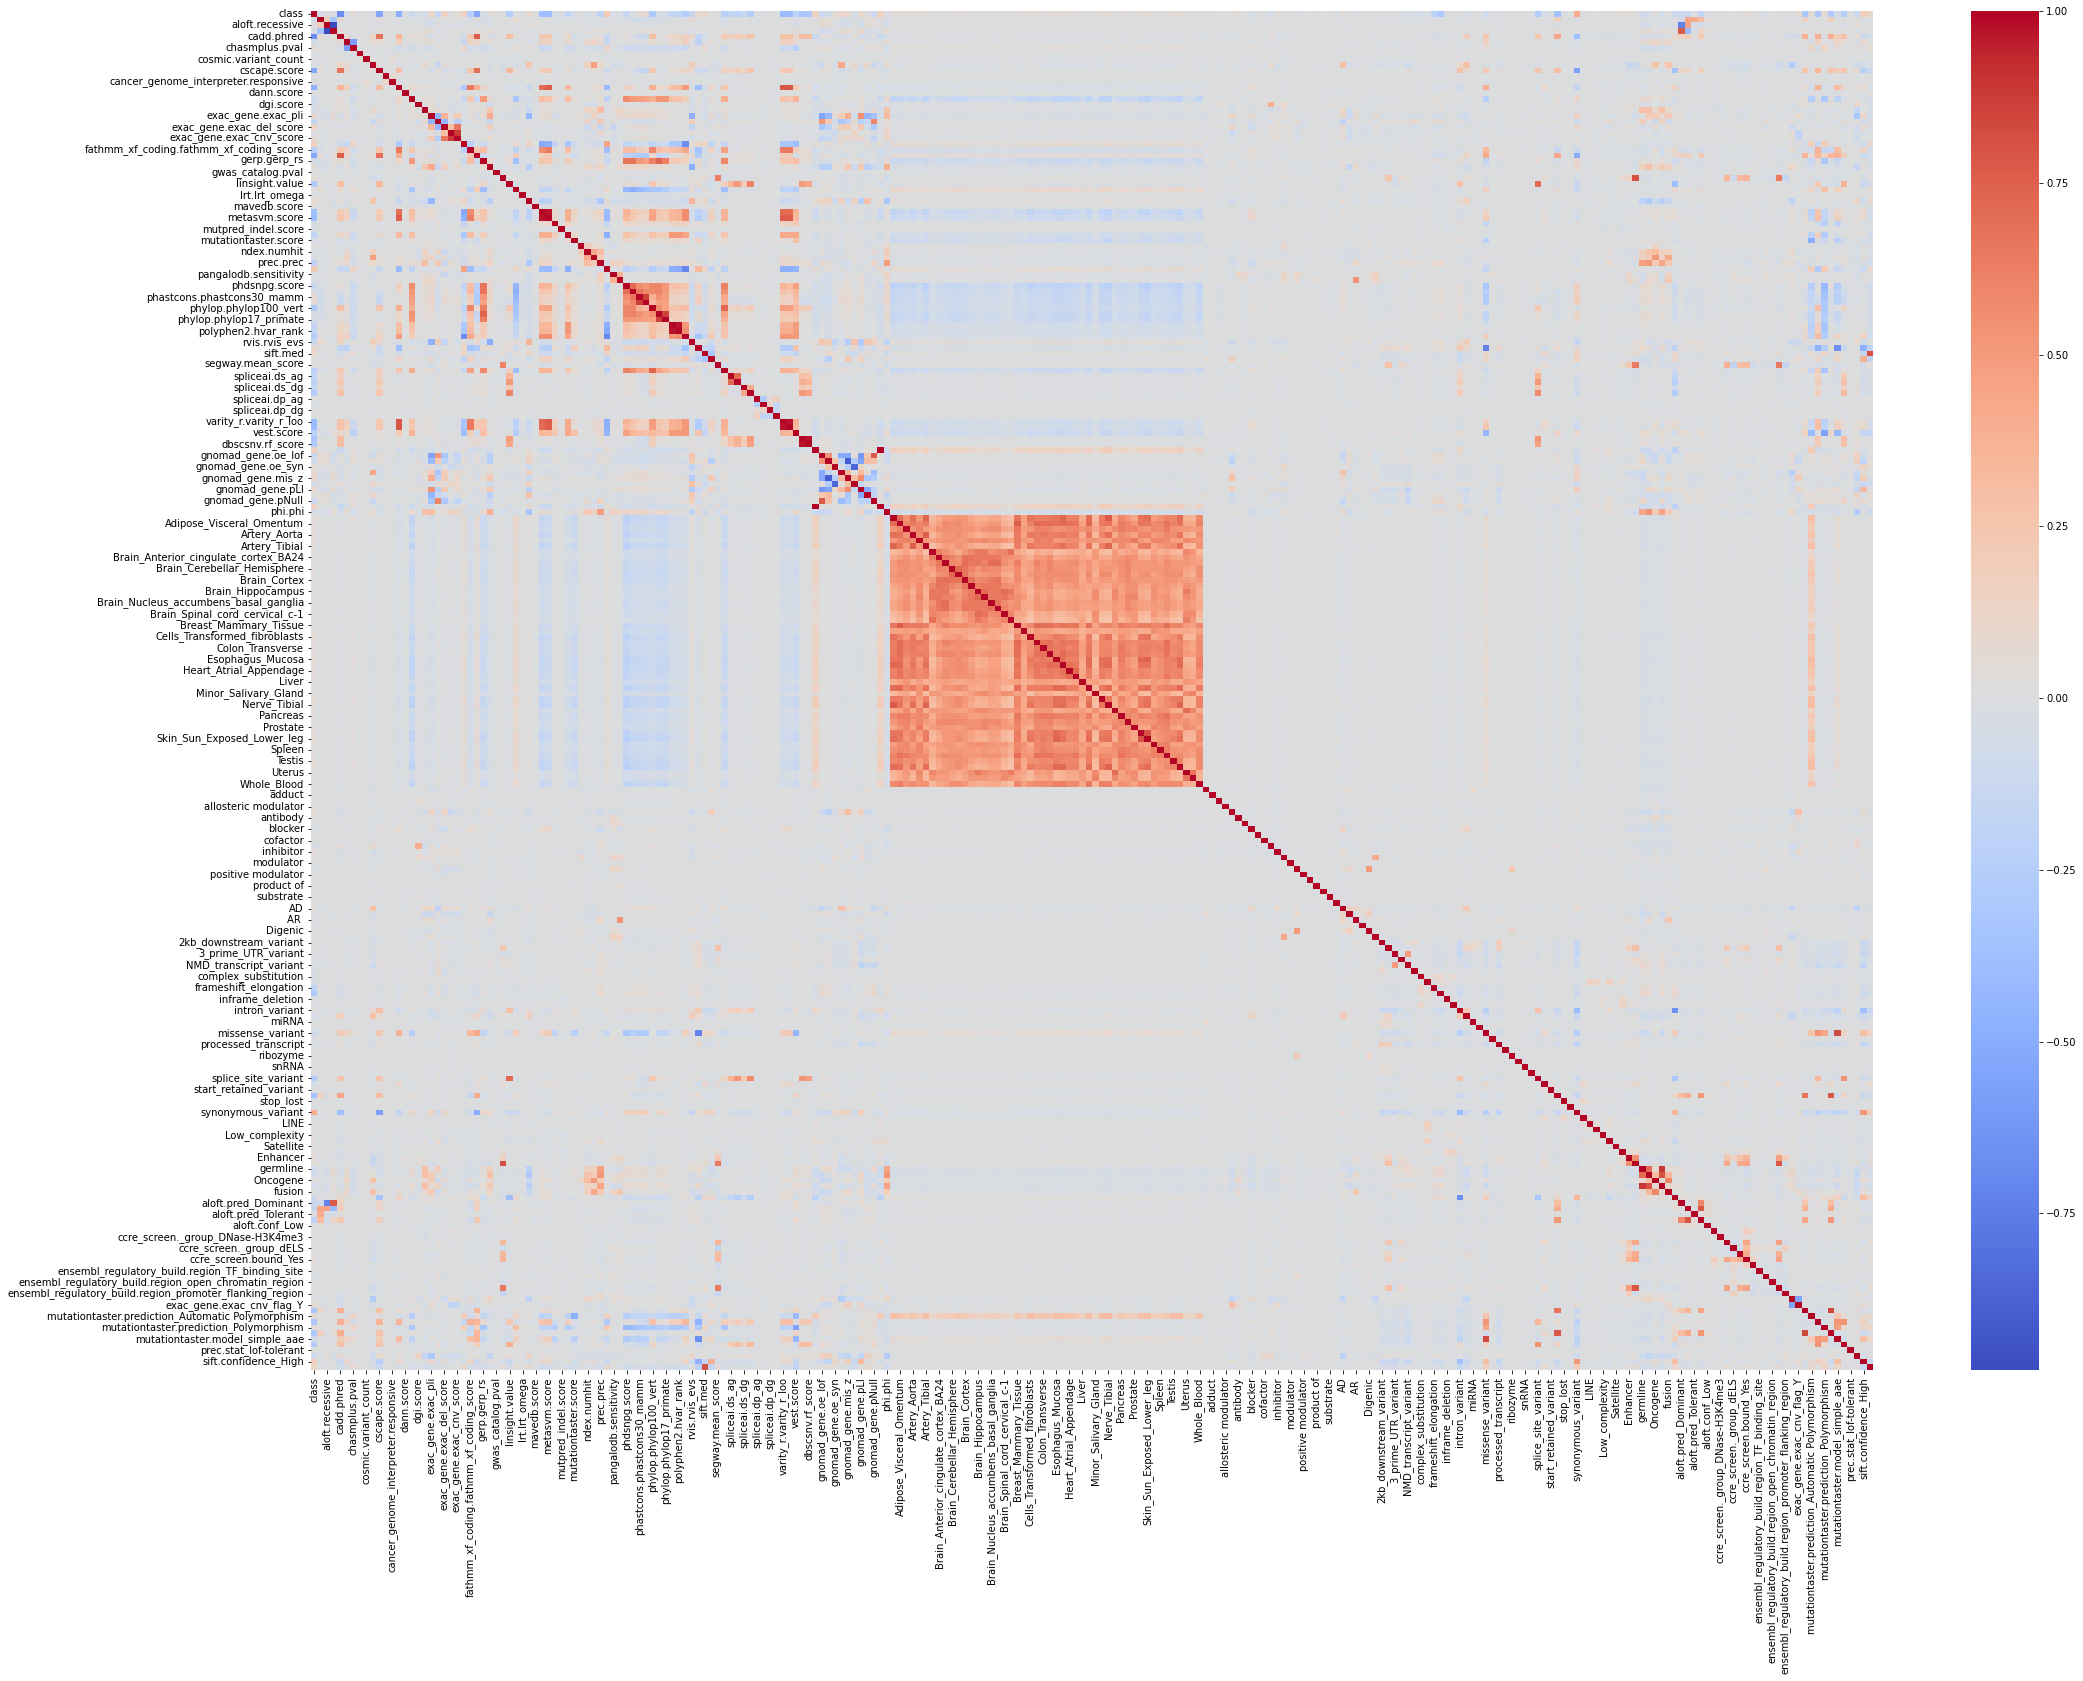

In [97]:
fig = plt.figure(figsize=(35, 25))
corr_matrix = X_train_df.corr()
sns.heatmap(corr_matrix, fmt=".2g", cmap="coolwarm")

In [98]:
# Create correlation matrix
corr_matrix_abs = corr_matrix.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix_abs.where(
            np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(np.bool)
        )



/scratch/local/ipykernel_197585/1278552867.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(np.bool)


In [99]:
# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(len(to_drop))
print(
            f"Correlated columns to be dropped: {to_drop}"
        )



6
Correlated columns to be dropped: ['aloft.dominant', 'metasvm.score', 'polyphen2.hvar_rank', 'varity_r.varity_er_loo', 'dbscsnv.rf_score', 'gnomad3.af']


<AxesSubplot:>

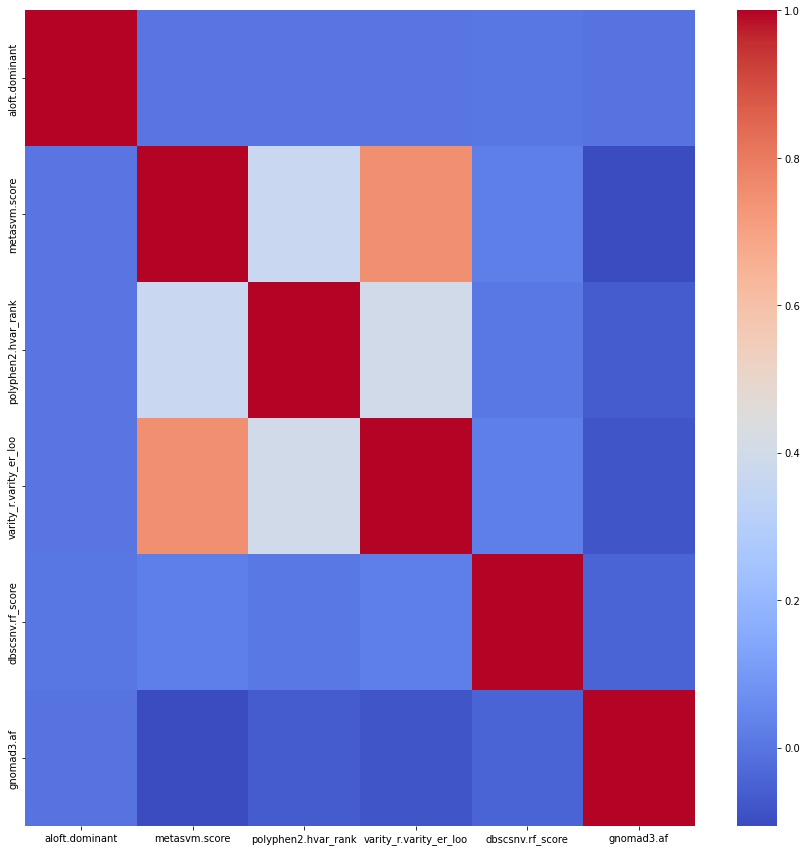

In [100]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(X_train_df[to_drop].corr(), fmt=".2g", cmap="coolwarm")

In [101]:
# Drop features
#df.drop(to_drop, axis=1, inplace=True)
X_train_df = X_train_df.reset_index(drop=True)
del corr_matrix, to_drop, upper, corr_matrix_abs

In [102]:
X_train_df.shape

(842659, 240)

In [103]:
#fig = plt.figure(figsize=(30,20))
#sns.heatmap(X_train.corr(), fmt=".2g", cmap="coolwarm")

In [104]:
#Give variant IDs and add the variant info columns
#df = df.reset_index(drop=True)
#df['ID'] = [f'var_{num}' for num in range(len(df))]
#print('NAs filled!')
X_train_df = pd.concat([var.reset_index(drop=True), X_train_df.reset_index(drop=True)], axis=1)
del var

In [105]:
print('\nVariant-transcript pairs shape =', X_train_df.shape)
print('\nVariants shape =', X_train_df[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)


Variant-transcript pairs shape = (842659, 255)

Variants shape = (148108, 4)


In [106]:
train_columns = X_train_df.columns.values.tolist()
print(train_columns)

['transcript', 'gene', 'consequence', 'protein_hgvs', 'cdna_hgvs', 'chrom', 'pos', 'ref_base', 'alt_base', 'clingen.disease', 'clingen.classification', 'ncbigene.entrez', 'omim.omim_id', 'uniprot.acc', 'dbsnp.rsid', 'class', 'aloft.tolerant', 'aloft.recessive', 'aloft.dominant', 'cadd.phred', 'chasmplus.score', 'chasmplus.pval', 'civic.molecular_profile_score', 'cosmic.variant_count', 'cosmic_gene.occurrences', 'cscape.score', 'cancer_genome_interpreter.resistant', 'cancer_genome_interpreter.responsive', 'clinpred.score', 'dann.score', 'dann_coding.dann_coding_score', 'dgi.score', 'ess_gene.indispensability_score', 'exac_gene.exac_pli', 'exac_gene.exac_pnull', 'exac_gene.exac_del_score', 'exac_gene.exac_dup_score', 'exac_gene.exac_cnv_score', 'fathmm.fathmm_score', 'fathmm_xf_coding.fathmm_xf_coding_score', 'funseq2.score', 'gerp.gerp_rs', 'ghis.ghis', 'gwas_catalog.pval', 'genehancer.score', 'linsight.value', 'lrt.lrt_score', 'lrt.lrt_omega', 'loftool.loftool_score', 'mavedb.score', '

In [107]:
print('\nData shape (After filtering) =', X_train_df.shape)
print('Class shape=', X_train_df.shape)


Data shape (After filtering) = (842659, 255)
Class shape= (842659, 255)


In [108]:
# Write it to a file
X_train_df.to_csv('./processed/train_data_3_star/train_class_data_80.csv.gz', index=False)
#y_train.to_csv('./processed/train_data_3_star/train_data-y_80.csv.gz', index=False)

# Preparing Testing data

In [119]:
X_test_df = X_test_df.drop(['aloft.affect','cancer_genome_interpreter.other','extra_vcf_info.CLNSIGCONF','extra_vcf_info.CLNSIG','extra_vcf_info.CLNREVSTAT','extra_vcf_info.CLNDN'], axis=1)

print('\nVariant-transcript pairs shape =', X_test_df.shape)



Variant-transcript pairs shape = (208167, 123)


In [120]:
print('\nImpact (Class):\n', X_test_df['class'].value_counts())


Impact (Class):
 low_impact     147809
high_impact     60358
Name: class, dtype: int64


In [121]:
# Drop variant info columns so we can perform one-hot encoding
var = X_test_df[config_dict['train_cols']]
X_test_df = X_test_df.drop(config_dict['train_cols'], axis=1)

In [122]:
# Double check if there are any columns with weird formatting as categorical before performing one-hot encoding
num_cols = X_test_df._get_numeric_data().columns

list(set(X_test_df.columns) - set(num_cols))

['genehancer.feature_name',
 'ccre_screen._group',
 'mutationtaster.prediction',
 'exac_gene.exac_cnv_flag',
 'coding',
 'class',
 'cgc.class',
 'ccre_screen.bound',
 'mutationtaster.model',
 'sift.confidence',
 'so',
 'aloft.conf',
 'gtex.gtex_tissue',
 'cgc.inheritance',
 'ensembl_regulatory_build.region',
 'prec.stat',
 'cgd.inheritance',
 'aloft.pred',
 'repeat.repeatclass',
 'dgi.interaction']

In [123]:
X_test_df.shape

(208167, 108)

In [124]:
#Perform one-hot encoding
for key in tqdm(config_dict["dummies_sep"]):
    X_test_df = pd.concat((X_test_df , X_test_df[key].str.get_dummies(sep = config_dict["dummies_sep"][key])), axis =1)
X_test_df = X_test_df.drop(list(config_dict["dummies_sep"].keys()), axis=1)
y = X_test_df['class']
X_test_df = pd.get_dummies(X_test_df.drop('class',axis=1), prefix_sep='_')
X_test_df.shape


100%|██████████| 8/8 [00:06<00:00,  1.28it/s]


(208167, 237)

In [125]:
X_test_df['gnomad3.af'] = X_test_df['gnomad3.af'].fillna(0)

In [126]:
for key in tqdm(median_scores.keys()):
            if key in X_test_df.columns:
                X_test_df[key] = (
                    X_test_df[key]
                    .fillna(median_scores[key])
                    .astype("float64")
                )

100%|██████████| 89/89 [00:00<00:00, 632.02it/s]


In [127]:
X_test_df.columns

Index(['aloft.tolerant', 'aloft.recessive', 'aloft.dominant', 'cadd.phred',
       'chasmplus.score', 'chasmplus.pval', 'civic.molecular_profile_score',
       'cosmic.variant_count', 'cosmic_gene.occurrences', 'cscape.score',
       ...
       'mutationtaster.prediction_Automatic Polymorphism',
       'mutationtaster.prediction_Damaging',
       'mutationtaster.prediction_Polymorphism',
       'mutationtaster.model_complex_aae', 'mutationtaster.model_simple_aae',
       'mutationtaster.model_without_aae', 'prec.stat_lof-tolerant',
       'prec.stat_recessive', 'sift.confidence_High', 'sift.confidence_Low'],
      dtype='object', length=237)

In [128]:
df2 = pd.DataFrame()
for key in tqdm(train_columns):
            if key in X_test_df.columns:
                df2[key] = X_test_df[key]
            else:
                df2[key] = 0

 40%|████      | 102/255 [00:00<00:00, 1013.96it/s]/scratch/local/ipykernel_197585/3124834107.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[key] = X_test_df[key]
/scratch/local/ipykernel_197585/3124834107.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[key] = 0
100%|██████████| 255/255 [00:00<00:00, 1161.91it/s]


In [129]:
print('\nData shape =', X_test_df.shape)
print('\nData shape =', df2.shape)


Data shape = (208167, 237)

Data shape = (208167, 255)


In [130]:
X_test_df = df2.copy()
del df2

In [131]:
# Check how many columns are null
X_test_df.isnull().sum(axis = 0)

transcript                                                  208167
gene                                                        208167
consequence                                                 208167
protein_hgvs                                                208167
cdna_hgvs                                                   208167
chrom                                                       208167
pos                                                         208167
ref_base                                                    208167
alt_base                                                    208167
clingen.disease                                             208167
clingen.classification                                      208167
ncbigene.entrez                                             208167
omim.omim_id                                                208167
uniprot.acc                                                 208167
dbsnp.rsid                                                  20

In [132]:
X_test_df = X_test_df.drop(config_dict['train_cols'], axis=1)

In [133]:
print('\nData shape =', X_test_df.shape)


Data shape = (208167, 240)


In [134]:
X_test_df.shape[0] == var.shape[0]

True

In [135]:
X_test_df = pd.concat([var.reset_index(drop=True), X_test_df.reset_index(drop=True)], axis=1)

In [139]:
X_test_df['class'] = y

In [140]:
# Check how many columns are null
X_test_df.isnull().sum(axis = 0)

transcript                                                       0
gene                                                             0
consequence                                                      0
protein_hgvs                                                 97243
cdna_hgvs                                                    27364
chrom                                                            0
pos                                                              0
ref_base                                                         0
alt_base                                                         0
clingen.disease                                              86112
clingen.classification                                       86112
ncbigene.entrez                                                410
omim.omim_id                                                168174
uniprot.acc                                                     80
dbsnp.rsid                                                   1

In [141]:
print('\nVariant-transcript pairs shape =', X_test_df.shape)
print('\nVariants shape =', X_test_df[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)


Variant-transcript pairs shape = (208167, 255)

Variants shape = (37027, 4)


In [142]:
print('\nData shape =', X_test_df.shape)
print('\nClass shape =', y.shape)


Data shape = (208167, 255)

Class shape = (208167,)


In [144]:
# Write it to a file
X_test_df.to_csv('./processed/train_data_3_star/test_class_data_20.csv.gz', index=False)
#y_test.to_csv('./processed/train_data_3_star/test_data-y_20.csv.gz', index=False)

In [145]:
del X_train, X_test, df

In [146]:
df = original.copy()

In [147]:
benchmark_columns = ['chrom','pos','ref_base','alt_base','transcript','cadd.phred','cscape.score','clinpred.score','dann.score','dann_coding.dann_coding_score','dgi.score','fathmm_xf_coding.fathmm_xf_coding_score','funseq2.score','linsight.value','lrt.lrt_score','loftool.loftool_score','metasvm.score','metalr.score','mutpred1.mutpred_general_score','mutpred_indel.score','mutation_assessor.score','mutationtaster.score','provean.score','phdsnpg.score','revel.score','sift.score','vest.score','dbscsnv.ada_score','dbscsnv.rf_score','varity_r.varity_r_loo', 'varity_r.varity_er_loo','extra_vcf_info.CLNSIG']
benchmark_df = df[benchmark_columns]
benchmark_df.columns = ['chrom','pos','ref_base','alt_base','transcript','CADD','Cscape','Clinpred','DANN','DANN_coding','DGI','fathmm_xf','funseq2','linsight','LRT','loftool','MetaSVM','MetaLR','Mutpred','Mutpred_indel','Mutation_assessor','Mutationtaster','Provean','phdsnpg','revel','SIFT','VEST','dbscsnv.ada_score','dbscsnv.rf_score','varity_r','varity_er','Clinvar']
benchmark_df.head()

,chrom,pos,ref_base,alt_base,transcript,CADD,Cscape,Clinpred,DANN,DANN_coding,...,Provean,phdsnpg,revel,SIFT,VEST,dbscsnv.ada_score,dbscsnv.rf_score,varity_r,varity_er,Clinvar
0,chr1,69134,A,G,ENST00000335137,16.91,0.480042,0.004,0.957771,0.957771,...,-3.56,0.133,0.075,0.107,0.107,NaN,NaN,0.130339,0.187185,Likely_benign
1,chr1,69134,A,G,ENST00000641515,16.91,0.480042,0.004,0.957771,0.957771,...,NaN,0.133,NaN,NaN,NaN,NaN,NaN,0.130339,0.187185,Likely_benign
2,chr1,69581,C,G,ENST00000335137,23.40,0.279863,0.998,0.996460,0.996460,...,-8.33,0.698,0.079,0.000,0.431,NaN,NaN,0.920156,0.857305,Uncertain_significance
3,chr1,69581,C,G,ENST00000641515,23.40,0.279863,0.998,0.996460,0.996460,...,NaN,0.698,NaN,NaN,NaN,NaN,NaN,0.920156,0.857305,Uncertain_significance
4,chr1,69682,G,A,ENST00000335137,20.80,0.329402,0.161,0.996149,0.996149,...,0.13,0.025,0.112,0.186,0.073,NaN,NaN,0.075164,0.069712,Uncertain_significance


In [148]:
benchmark_df.shape

(12973645, 32)

In [149]:
# Write it to a file
benchmark_df.to_csv('./processed/train_data_3_star/benchmark_class_data.csv.gz', index=False)

In [165]:
original.so.head()

0    missense_variant
2    missense_variant
4    missense_variant
6    missense_variant
8    missense_variant
Name: so, dtype: object

In [175]:
def test_parsing(dataframe, config_dict):
    # Drop variant info columns so we can perform one-hot encoding
    var = dataframe[config_dict['id_cols']]
    dataframe = dataframe.drop(config_dict['id_cols'], axis=1)
    #dataframe = dataframe.replace(['.','-'], np.nan)
    
    #Perform one-hot encoding
    for key in tqdm(config_dict["dummies_sep"]):
        dataframe = pd.concat((dataframe , dataframe[key].str.get_dummies(sep = config_dict["dummies_sep"][key])), axis =1)
    dataframe = dataframe.drop(list(config_dict["dummies_sep"].keys()), axis=1)
    dataframe = pd.get_dummies(dataframe, prefix_sep='_')
    
    for key in tqdm(list(config_dict['median_scores'].keys())):
            if key in dataframe.columns:
                dataframe[key] = (
                    dataframe[key]
                    .fillna(config_dict['median_scores'][key])
                    .astype("float64")
                )
                
    df2 = pd.DataFrame()
    for key in tqdm(config_dict["filtered_cols"]):
            if key in dataframe.columns:
                df2[key] = dataframe[key]
            else:
                df2[key] = 0
    del dataframe
              
    df2 = df2.drop(config_dict['id_cols'], axis=1)
    df2 = pd.concat([var.reset_index(drop=True), df2.reset_index(drop=True)], axis=1)
    return df2


In [176]:
len(config_dict["filtered_cols"])

294

In [185]:
df2 = test_parsing(original, config_dict)
print('\nData shape =', df2.shape)
# Write it to a file
df2.to_csv('./processed/clinvar_filtered.csv.gz', index=False)

100%|██████████| 294/294 [00:53<00:00,  5.46it/s]



Data shape = (10695155, 293)


In [186]:
list(set(df2.columns) - set(config_dict["filtered_cols"]))

[]